# Player performance matric

### Import libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load data:

In [2]:
df = pd.read_csv('Final data.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [3]:
df.head()

,Name,Nationality,Club,Position,Apps,Minutes Played,Distance Run (km),Average Rating,Player of the Match,Goals,...,Ref,TRO,Sta,Str,Tck,Tea,Tec,Thr,Vis,Wor
0,A Singular Tub of FazeBerry ® GFuel ® Energy F...,"""English""","""Athênai F.C.""","""WB/M (R)""",1.0,90,13.2,6.9,0,1,...,1.0,1.0,20.0,10.0,8.0,9.0,9.0,1.0,9.0,10.0
1,Aleksandar Stojakovic,"""Serbian""","""Inter London""","""D (C). DM""",1.0,90,11.4,7.9,0,1,...,1.0,1.0,20.0,10.0,13.0,11.0,5.0,1.0,5.0,12.0
2,Alessio Calvatore,"""Italian""","""Cairo City""","""DM. M (C)""",1.0,90,10.9,7.2,0,0,...,1.0,1.0,20.0,10.0,10.0,12.0,13.0,1.0,11.0,12.0
3,Alfredo Puttanesca,"""Canadian""","""Cairo City""","""WB/M (L)""",1.0,90,13.0,7.5,0,1,...,2.0,3.0,20.0,10.0,9.0,7.0,10.0,2.0,7.0,8.0
4,Andreas Aadnevik,"""Norwegian""","""Athênai F.C.""","""ST (C)""",1.0,90,12.8,6.1,0,0,...,1.0,1.0,20.0,10.0,5.0,8.0,5.0,1.0,5.0,8.0


### Pre-processing:

Dropping rows where position is "GK" as for Goalkeepers they dont have any expectated measure of how many goals they will score given their chances. So, this model will be only for players how's position is not "GK".

In [4]:
len(df[df.Position == '"GK"']), len(df[df.Position != '"GK"'])

(860, 8835)

In [5]:
df = df[df.Position != '"GK"']

In [6]:
len(df)

8835

## XG

Expected goals is a measure of how many goals the player was expected to score given their chances

### Data frame for xG

In [7]:
df_xg = pd.DataFrame(df.iloc[: , 11].copy())
temp = df.iloc[: , 46:93].copy()
df_xg = df_xg.join(temp)

In [8]:
df_xg.head()

,xG,Acc,Aer,Agg,Agi,Ant,Bal,Bra,Cmd,Com,...,Ref,TRO,Sta,Str,Tck,Tea,Tec,Thr,Vis,Wor
0,0.12,13.0,1.0,7.0,13.0,10.0,10.0,6.0,1.0,1.0,...,1.0,1.0,20.0,10.0,8.0,9.0,9.0,1.0,9.0,10.0
1,0.30,7.0,1.0,10.0,5.0,12.0,10.0,11.0,1.0,1.0,...,1.0,1.0,20.0,10.0,13.0,11.0,5.0,1.0,5.0,12.0
2,0.00,10.0,1.0,5.0,5.0,8.0,10.0,5.0,1.0,1.0,...,1.0,1.0,20.0,10.0,10.0,12.0,13.0,1.0,11.0,12.0
3,0.18,11.0,1.0,5.0,12.0,8.0,11.0,6.0,4.0,3.0,...,2.0,3.0,20.0,10.0,9.0,7.0,10.0,2.0,7.0,8.0
4,0.00,14.0,1.0,5.0,10.0,14.0,5.0,5.0,1.0,1.0,...,1.0,1.0,20.0,10.0,5.0,8.0,5.0,1.0,5.0,8.0


### Feature engineering:

As we are not taking Goalkeepers in our consideration in this performace matric of xG so we will drop those attributes which are specified for goalkeepers in our data e.g: 

*   Aer - Aerial Reach
*   Cmd - Command of Area
*   Com - Communication
*   Ecc - Eccentricity
*   Han - Handling
*   Kic - Kicking
*   1v1 - One on One
*   Pun - Tendency to Punch
*   Ref - Reflexes
*   TRO - Tendency to Rush
*   Thr - Throwing













In [9]:
df_xg.shape

(8835, 48)

In [10]:
df_xg = df_xg.drop(['Aer', 'Cmd', 'Com', 'Ecc', 'Han', 'Kic', '1v1', 'Pun', 'Ref', 'TRO', 'Thr'], axis=1)

In [11]:
df_xg.shape

(8835, 37)

In [12]:
df_xg = df_xg.dropna()

In [13]:
#df_xg.isnull().sum()

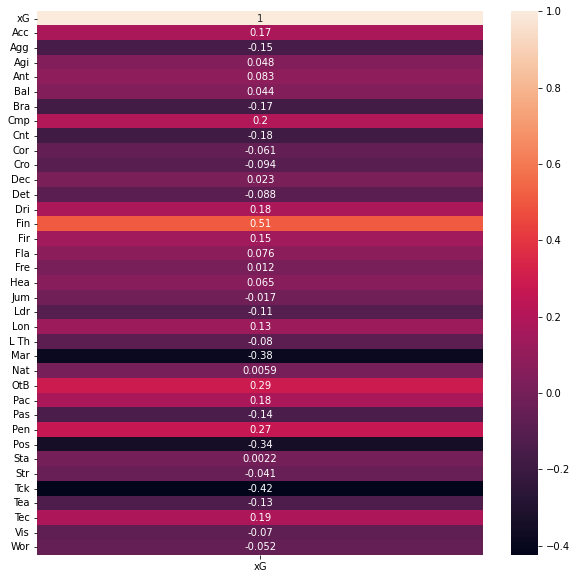

In [14]:
# Correlation of features with xG
plt.figure(figsize=(10,10))
sns.heatmap(df_xg.corr()[['xG']], annot=True)
plt.show()

### Splitting into the test set and training set

In [15]:
training_set = df_xg.iloc[:, :].values
X = training_set[:, 1:37]
y = training_set[:,0]

In [16]:
X.shape

(8579, 36)

In [17]:
y.shape

(8579,)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
X_train.shape

(6863, 36)

In [20]:
X_test.shape

(1716, 36)

### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear regression baseline model (mae: 0.142, rmse: 0.232)

In [26]:
from sklearn import datasets, linear_model, metrics

In [67]:
# create linear regression object
reg = linear_model.LinearRegression()

In [68]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [70]:
# make predictions on the test set
y_pred_reg = reg.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [71]:
# RMSE
mean_squared_error(y_test, y_pred_reg, squared=False)

0.23253342687204842

In [72]:
# MAE
mean_absolute_error(y_test, y_pred_reg)

0.1426202572039803

### ANN simple (mae: 0.123, rmse: 0.236)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [31]:
regressor = Sequential()

In [32]:
#adding the input layer and the first hidden layer with dropout
regressor.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu', input_dim =36))
regressor.add(Dropout(0.01))

In [33]:
#adding the second hidden layer
regressor.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor.add(Dropout(0.01))

In [34]:
#adding a thrid hidden layer
regressor.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor.add(Dropout(0.01))

In [35]:
#adding a fourth hidden layer
regressor.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor.add(Dropout(0.01))

In [36]:
#adding the output layer
regressor.add(Dense(units = 1, kernel_initializer = 'normal',activation = 'linear'))

In [37]:
#compiling the ANN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

In [38]:
#del regressor
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3700      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               1

In [39]:
#Fitting the ANN to the training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
687/687 [==============================] - 2s 2ms/step - loss: 0.1232 - mean_absolute_error: 0.1232
Epoch 2/100
687/687 [==============================] - 1s 2ms/step - loss: 0.1186 - mean_absolute_error: 0.1186
Epoch 3/100
687/687 [==============================] - 1s 2ms/step - loss: 0.1180 - mean_absolute_error: 0.1180
Epoch 4/100
687/687 [==============================] - 1s 2ms/step - loss: 0.1164 - mean_absolute_error: 0.1164
Epoch 5/100
687/687 [==============================] - 1s 2ms/step - loss: 0.1160 - mean_absolute_error: 0.1160
Epoch 6/100
687/687 [==============================] - 1s 2ms/step - loss: 0.1155 - mean_absolute_error: 0.1155
Epoch 7/100
687/687 [==============================] - 1s 2ms/step - loss: 0.1154 - mean_absolute_error: 0.1154
Epoch 8/100
687/687 [==============================] - 1s 2ms/step - loss: 0.1143 - mean_absolute_error: 0.1143
Epoch 9/100
687/687 [==============================] - 1s 2ms/step - loss: 0.1147 - mean_absolute_error:

In [64]:
y_pred = regressor.predict(X_test)

54/54 [==============================] - 0s 1ms/step


In [65]:
# RMSE
rmse_ann = mean_squared_error(y_test, y_pred, squared=False)
rmse_ann

0.23680619924019988

In [66]:
# MAE
mae_ann = mean_absolute_error(y_test, y_pred)
mae_ann

0.12350528882615082

### Tuning the ANN model

In [73]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense
def build_regressor(optimizer):
    regressor = Sequential()
    regressor.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu', input_dim =36))
    regressor.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
    regressor.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
    regressor.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
    regressor.add(Dense(units = 1, kernel_initializer = 'normal',activation = 'linear'))
    regressor.compile(optimizer = optimizer, loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])     
    return regressor

regressor = KerasRegressor(build_fn = build_regressor)

parameters = {'batch_size': [4,8],
              'nb_epoch': [500,1000],
              'optimizer': ['adam', 'rmsprop', 'sgd']}

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv =10)

#this might take a while 
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

<ipython-input-73-a54a4f484440>:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn = build_regressor)


1716/1716 [==============================] - 4s 2ms/step - loss: 0.1526 - mean_absolute_error: 0.1526


In [74]:
best_parameters

{'batch_size': 4, 'nb_epoch': 1000, 'optimizer': 'adam'}

### Best settings of ANN (mae: 0.125, rmse: 0.238)

In [75]:
regressor_best = Sequential()

regressor_best.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu', input_dim =36))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 1, kernel_initializer = 'normal',activation = 'linear'))

regressor_best.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

regressor_best.fit(X_train, y_train, batch_size = 4, epochs = 1000)

Epoch 1/1000
1716/1716 [==============================] - 4s 2ms/step - loss: 0.1271 - mean_absolute_error: 0.1271
Epoch 2/1000
1716/1716 [==============================] - 3s 2ms/step - loss: 0.1188 - mean_absolute_error: 0.1188
Epoch 3/1000
1716/1716 [==============================] - 3s 2ms/step - loss: 0.1183 - mean_absolute_error: 0.1183
Epoch 4/1000
1716/1716 [==============================] - 3s 2ms/step - loss: 0.1177 - mean_absolute_error: 0.1177
Epoch 5/1000
1716/1716 [==============================] - 3s 2ms/step - loss: 0.1175 - mean_absolute_error: 0.1175
Epoch 6/1000
1716/1716 [==============================] - 3s 2ms/step - loss: 0.1161 - mean_absolute_error: 0.1161
Epoch 7/1000
1716/1716 [==============================] - 3s 2ms/step - loss: 0.1161 - mean_absolute_error: 0.1161
Epoch 8/1000
1716/1716 [==============================] - 3s 2ms/step - loss: 0.1162 - mean_absolute_error: 0.1162
Epoch 9/1000
1716/1716 [==============================] - 3s 2ms/step - loss: 0.

In [76]:
y_pred_best = regressor_best.predict((X_test))

54/54 [==============================] - 0s 1ms/step


In [77]:
# RMSE
mean_squared_error(y_test, y_pred_best, squared=False)

0.23870186639378144

In [78]:
# MAE
mae_ann_best = mean_absolute_error(y_test, y_pred_best)
mae_ann_best

0.12514346359321513



---



### XGBoost (mae: 0.143, rmse: 0.251)

In [52]:
import xgboost as xg
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [53]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', learning_rate = 0.1,
                max_depth = 15, alpha = 15, n_estimators = 40)

In [54]:
xgb_r.fit(X_train, y_train)

[06:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=15, max_depth=15, n_estimators=40)

In [55]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(xgb_r, X_train, y_train, cv=kfold)

[06:24:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [56]:
y_test_pred = xgb_r.predict(X_test)

In [57]:
# MSE
mse = mean_squared_error(y_test, y_test_pred)
mse

0.06301009920643212

In [58]:
# RMSE
mean_squared_error(y_test, y_test_pred, squared=False)

0.25101812525479533

In [59]:
# R2
r2 = r2_score(y_test, y_test_pred)
r2

0.14174016862663907

In [60]:
# MAE
mae = mean_absolute_error(y_test, y_test_pred)
mae

0.14381454156689988



---



### Extra try with ANN

In [23]:
regressor_best = Sequential()

regressor_best.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu', input_dim =36))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 1, kernel_initializer = 'normal',activation = 'linear'))

regressor_best.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

regressor_best.fit(X_train, y_train, batch_size = 8, epochs = 500)

Epoch 1/500
858/858 [==============================] - 4s 3ms/step - loss: 0.1281 - mean_absolute_error: 0.1281
Epoch 2/500
858/858 [==============================] - 3s 4ms/step - loss: 0.1224 - mean_absolute_error: 0.1224
Epoch 3/500
858/858 [==============================] - 3s 3ms/step - loss: 0.1196 - mean_absolute_error: 0.1196
Epoch 4/500
858/858 [==============================] - 3s 3ms/step - loss: 0.1200 - mean_absolute_error: 0.1200
Epoch 5/500
858/858 [==============================] - 3s 3ms/step - loss: 0.1186 - mean_absolute_error: 0.1186
Epoch 6/500
858/858 [==============================] - 3s 3ms/step - loss: 0.1186 - mean_absolute_error: 0.1186
Epoch 7/500
858/858 [==============================] - 3s 3ms/step - loss: 0.1172 - mean_absolute_error: 0.1172
Epoch 8/500
858/858 [==============================] - 3s 3ms/step - loss: 0.1172 - mean_absolute_error: 0.1172
Epoch 9/500
858/858 [==============================] - 4s 5ms/step - loss: 0.1165 - mean_absolute_error:

In [24]:
y_pred_best = regressor_best.predict((X_test))

54/54 [==============================] - 0s 2ms/step


In [28]:
# RMSE
mean_squared_error(y_test, y_pred_best, squared=False)

0.23985478952871075

In [29]:
# MAE
mae_ann_best = mean_absolute_error(y_test, y_pred_best)
mae_ann_best

0.12369613948838497